# Imports

In [1]:
from warnings import simplefilter # import warnings filter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

from cdtools.util.pandas_dataframe_operations import compare_dataframes, impute_dataframe
from cdtools.CD_tools import CDML, compare_binary_columns, df_2_xlsx, df_balance, high_correlation_filter, PCA_analyse, voting_classifier, zero_variance_columns
from cdtools.dataprocessing.feature_engineering import get_feature_lists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Configuration

In [2]:
# Show figures inside the notebook
%matplotlib inline

# Show all columns inside the dataframe
pd.options.display.max_columns = None

# Set default figure size of figures in the notebook
plt.rcParams['figure.figsize'] = [16, 8]

# Set fonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [3]:
input_data_directory = "../data/input/titanic/"
output_data_directory = "../data/output/titanic/"

# Read data

In [4]:
column_data_types = {
    "PassengerId": str, # Passenger identifier.
    #"Name": str, # Passenger name.
    "Sex": str, # Gender.
    "Age": float, # Age in years.
    "SibSp": int, # Number of siblings / spouses aboard the Titanic.
    "Parch": int, # Number of parents / children aboard the Titanic.
    "Embarked": str, # Port of embarkation.
    #"Ticket": str, # Ticket number.
    "Pclass": str, # Ticket class.
    #"Cabin": str, # Cabin number.    
    "Fare": float, # Passenger fare.
    "Survived": bool, # Survival indicator.
    }

keys = ["PassengerId"]
labels = ["Survived"]
features, features_categorical, features_numeric, features_boolean = (
    get_feature_lists(column_data_types,keys,labels)
    )
features_categorical_classes_2_drop = ["male","S","3"]

df_train_data = pd.read_csv(input_data_directory+"train.csv",dtype=column_data_types)
df_train_data = df_train_data[keys + features + labels]
df_test_data = pd.read_csv(input_data_directory+"test.csv",dtype=column_data_types)
df_test_data = df_test_data[keys + features]

# Data preprocessing

### Impute missing values

In [5]:
print("Number of missing values per column before imputation.")
display(df_train_data.isnull().sum())
df_train_data = impute_dataframe(df_train_data)
print("Number of missing values per column after imputation.")
display(df_train_data.isnull().sum())

Number of missing values per column before imputation.


PassengerId      0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
Pclass           0
Fare             0
Survived         0
dtype: int64

Number of missing values per column after imputation.


PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Pclass         0
Fare           0
Survived       0
dtype: int64

In [6]:
print("Number of missing values per column before imputation.")
display(df_test_data.isnull().sum())
df_test_data = impute_dataframe(df_test_data)
print("Number of missing values per column after imputation.")
display(df_test_data.isnull().sum())

Number of missing values per column before imputation.


PassengerId     0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
Pclass          0
Fare            1
dtype: int64

Number of missing values per column after imputation.


PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Pclass         0
Fare           0
dtype: int64

# Build a classification model with default settings

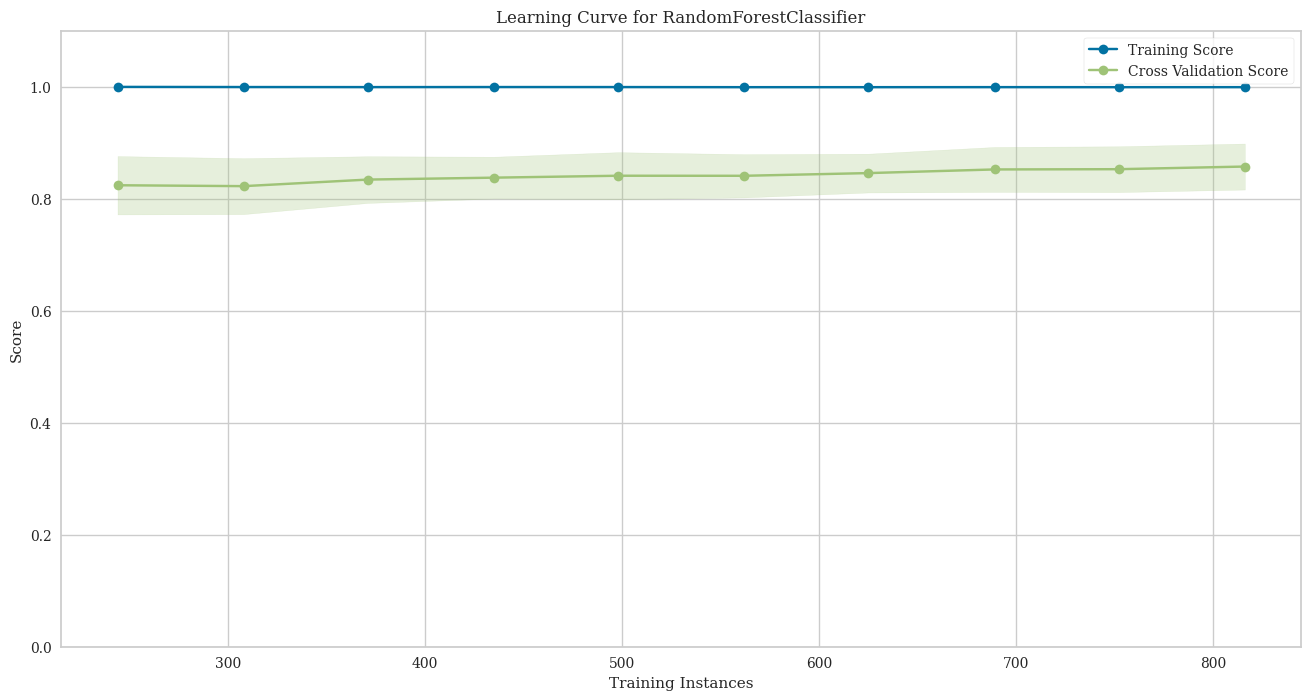

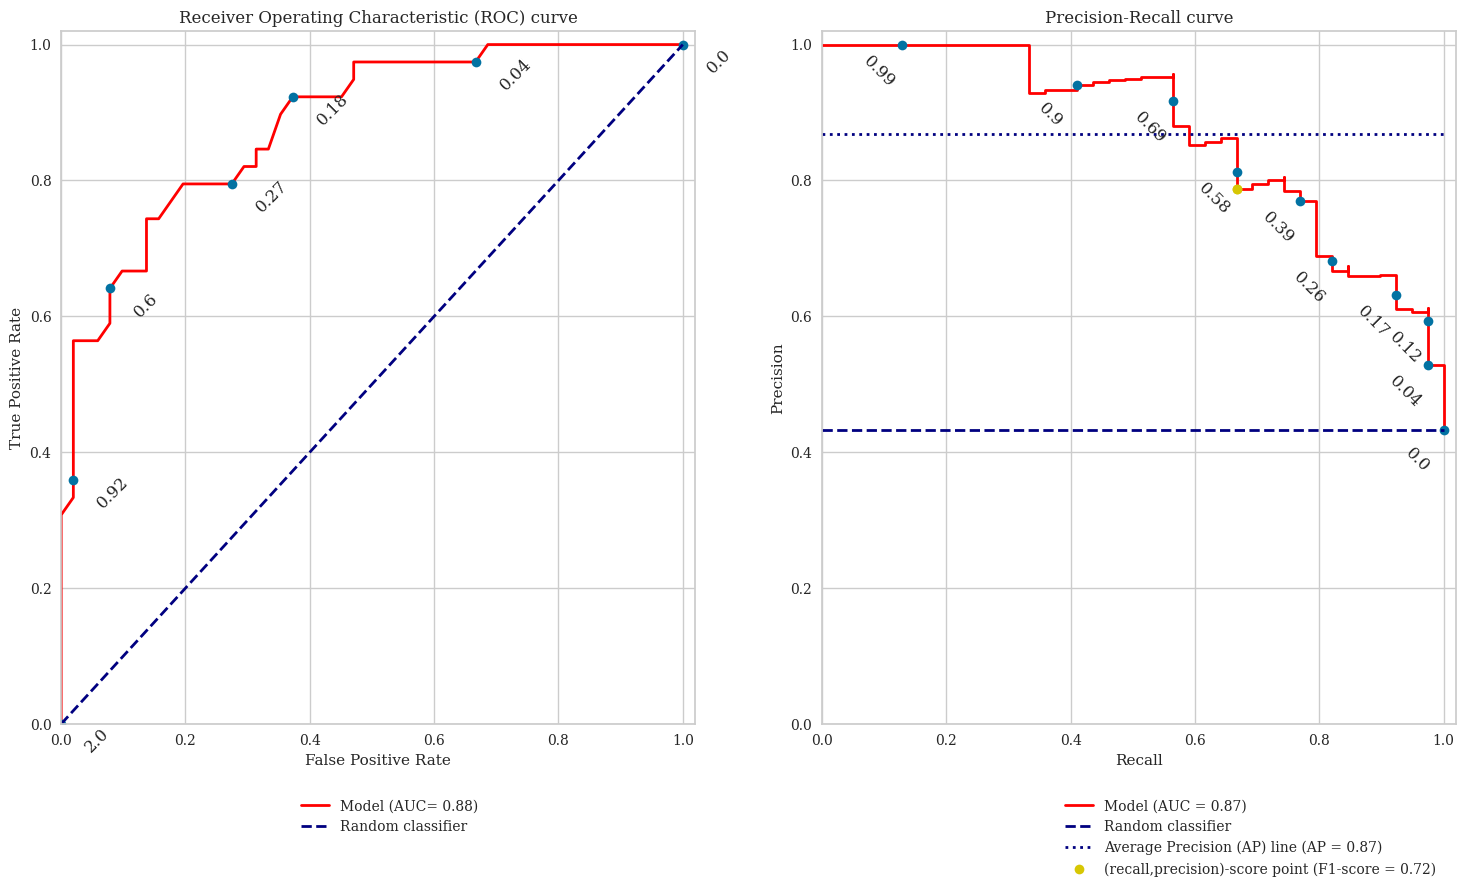

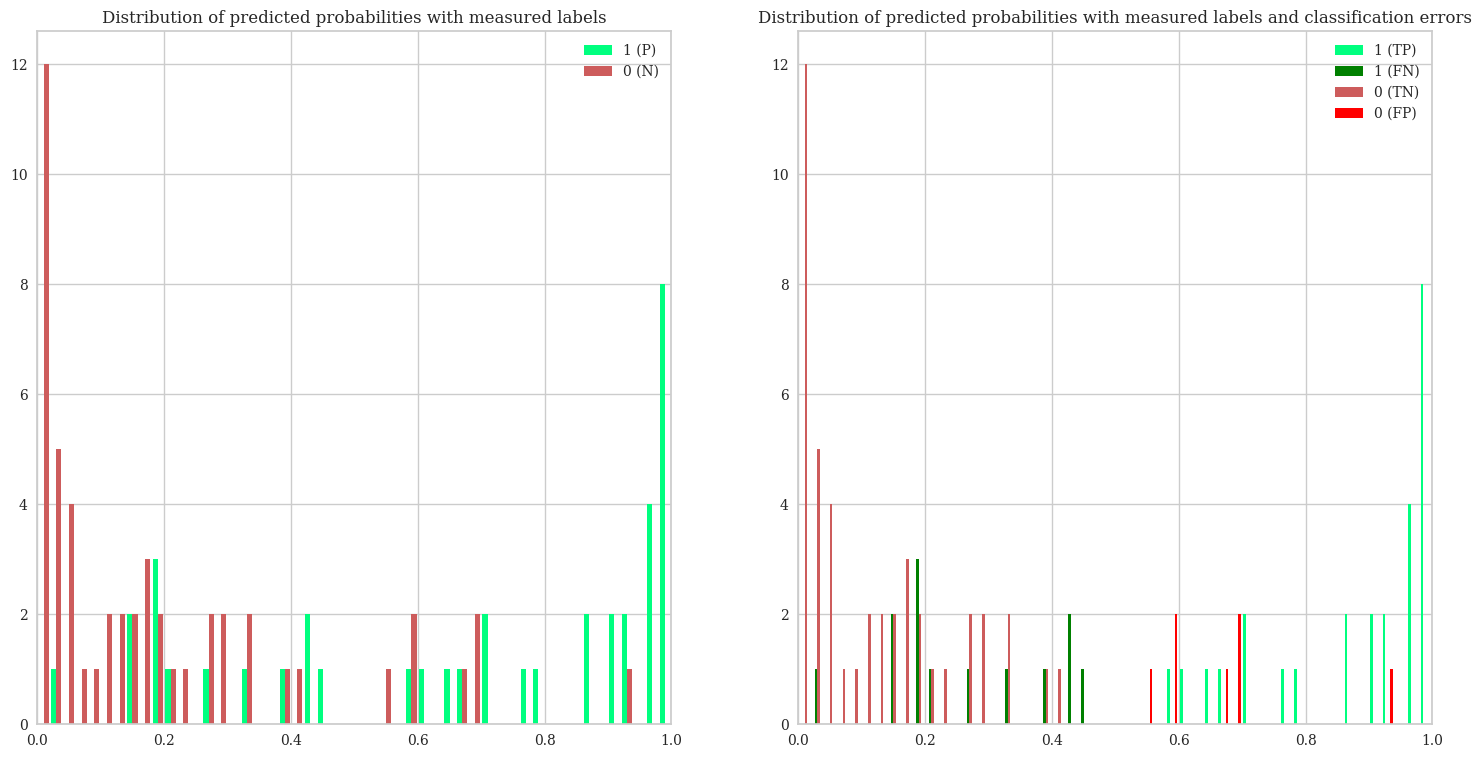

Note: Model features are sorted by importance for the model!
Features with zero importance for the model:  []


/home/rien/anaconda3/envs/data-science-tools/lib/python3.9/site-packages/pandas/io/formats/style.py:4187: RuntimeWarning: invalid value encountered in double_scalars
  start, end = z_frac, (x - left) / (right - left)


,PassengerId,Survived,prediction,bias,Age,Age (contribution),Fare,Fare (contribution),Sex female,Sex female (contribution),SibSp,SibSp (contribution),Pclass 1,Pclass 1 (contribution),Parch,Parch (contribution),Pclass 2,Pclass 2 (contribution),Embarked C,Embarked C (contribution),Embarked Q,Embarked Q (contribution)
index,,,,,,,,,,,,,,,,,,,,,,
310,311,True,1.000000,0.376592,24.000000,0.019095,83.158300,0.139232,1.000000,0.280736,0.000000,0.007638,1.000000,0.124560,0.000000,0.015301,0.000000,-0.004875,1.000000,0.041243,0.000000,0.000477
496,497,True,1.000000,0.376592,54.000000,-0.043261,78.266700,0.163262,1.000000,0.296609,1.000000,0.028155,1.000000,0.121400,0.000000,0.020260,0.000000,-0.004226,1.000000,0.039982,0.000000,0.001227
319,320,True,0.990000,0.376592,40.000000,0.014741,134.500000,0.125206,1.000000,0.272677,1.000000,0.025702,1.000000,0.123275,1.000000,0.011152,0.000000,-0.004226,1.000000,0.043942,0.000000,0.000941
880,881,True,0.990000,0.376592,25.000000,0.010745,26.000000,0.067495,1.000000,0.334352,0.000000,0.043691,0.000000,-0.043277,1.000000,0.062000,1.000000,0.148346,0.000000,-0.007401,0.000000,-0.002544
535,536,True,0.990000,0.376592,7.000000,0.094677,26.250000,0.048868,1.000000,0.289255,0.000000,0.043000,0.000000,-0.038369,2.000000,0.017848,1.000000,0.170389,0.000000,-0.010729,0.000000,-0.001530


,PassengerId,Survived,prediction,intercept,Age,Age (contribution),Age (decision),Embarked,Embarked (contribution),Embarked (decision),Fare,Fare (contribution),Fare (decision),Parch,Parch (contribution),Parch (decision),Pclass,Pclass (contribution),Pclass (decision),Sex,Sex (contribution),Sex (decision),SibSp,SibSp (contribution),SibSp (decision)
index,,,,,,,,,,,,,,,,,,,,,,,,,
495,496,False,0.091566,0.295333,23.0,-0.04109,21.00 < Age <= 29.00,C,-0.002552,Embarked=0,14.4583,-0.019998,13.86 < Fare <= 30.50,0,-0.074475,Parch <= 0.00,3,-0.072434,Pclass=2,male,0.008654,Sex=male,0,-0.001872,SibSp <= 0.00
648,649,False,0.150345,0.277174,4.0,0.108838,Age <= 21.00,S,-0.001308,Embarked=2,7.55,-0.082382,Fare <= 7.90,0,-0.077989,Parch <= 0.00,3,-0.075607,Pclass=2,male,0.001004,Sex=male,0,0.000614,SibSp <= 0.00
278,279,False,0.259144,0.179197,7.0,0.125672,Age <= 21.00,Q,-0.005147,Embarked=1,29.125,-0.02166,13.86 < Fare <= 30.50,1,0.072856,Parch > 0.00,3,-0.073864,Pclass=2,male,-0.000163,Sex=male,4,-0.017748,SibSp > 1.00
31,32,True,0.374385,0.164429,6.0,0.111449,Age <= 21.00,C,-0.00288,Embarked=0,146.5208,0.135814,Fare > 30.50,0,-0.066175,Parch <= 0.00,1,0.033007,Pclass=0,female,-0.005725,Sex=female,1,0.004466,0.00 < SibSp <= 1.00
255,256,True,0.158839,0.228561,29.0,-0.036785,21.00 < Age <= 29.00,C,0.000035,Embarked=0,15.2458,-0.021622,13.86 < Fare <= 30.50,2,0.068241,Parch > 0.00,3,-0.080319,Pclass=2,female,0.005344,Sex=female,0,-0.004616,SibSp <= 0.00


In [7]:
rc = CDML(df_train_data,column_data_types,keys,labels,features_categorical_classes_2_drop=features_categorical_classes_2_drop)
rc.split_data(test_size=0.1,random_state=0,sampling=None)
rc.classification_model_data("RandomForestClassifier(random_state=0,n_estimators=100)",threshold=0.5)
rc.show_learning_curve(ylim=(0,1.1),cv=StratifiedKFold(12),n_jobs=4,train_sizes=np.linspace(0.3,1.0,10),scoring='roc_auc')
rc.classification_show_ROC_precision_recall_curves(show_labels='Y',label_interval=6,label_offsets_ROC=[15,-20],label_offsets_PR=[-30,-30])
rc.classification_show_prediction_distributions(nrbins=51)
rc.save_feature_importance()
rc.classification_show_interpretation_table(sort_columns='Y',top=5)
rc.classification_transpose_interpretation_table()
rc.classification_show_interpretation_table_LIME(top=5,num_samples=5000)
rc.classification_transpose_interpretation_table_LIME()

# Optimize the classification model using hyperparameter tuning

Best estimator:
RandomForestClassifier(max_depth=10, n_estimators=250, n_jobs=-1,
                       random_state=0)



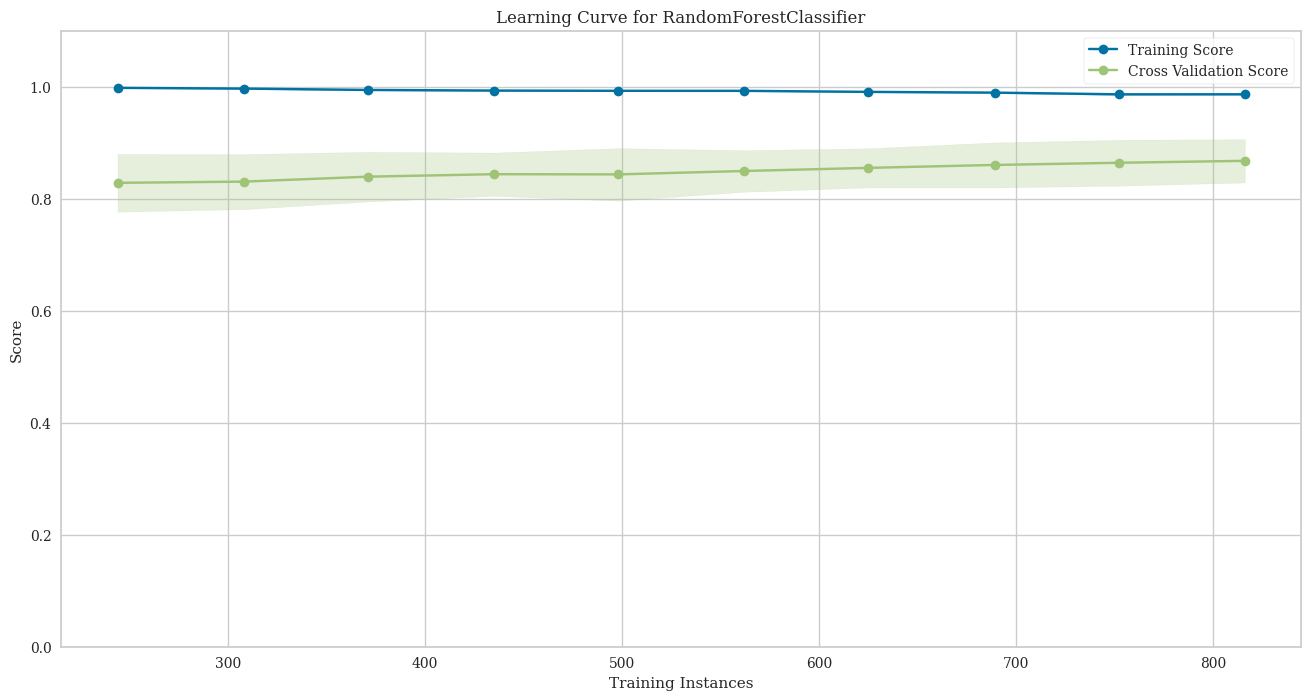

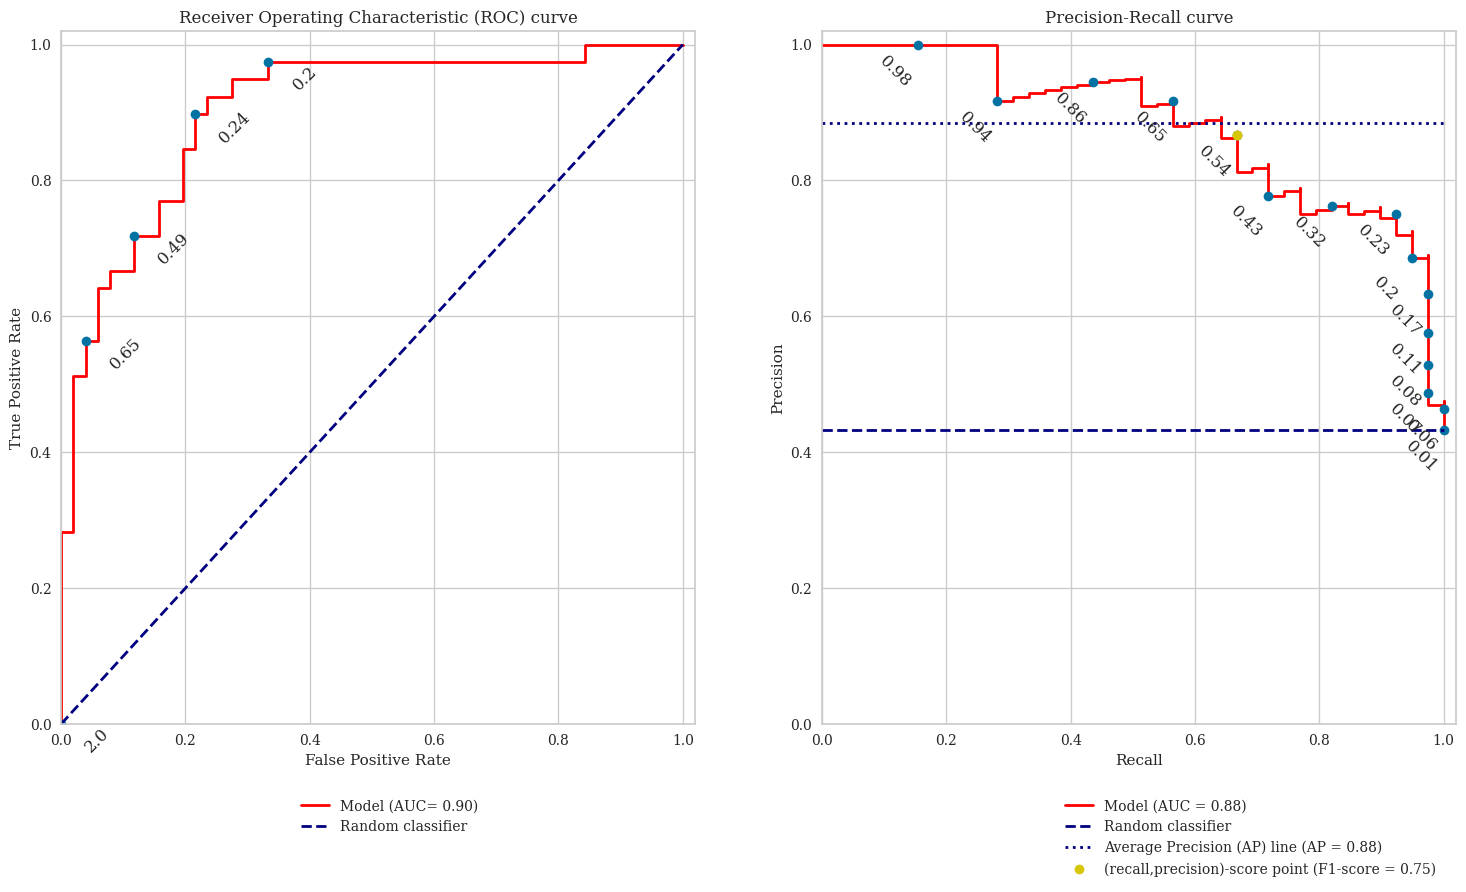

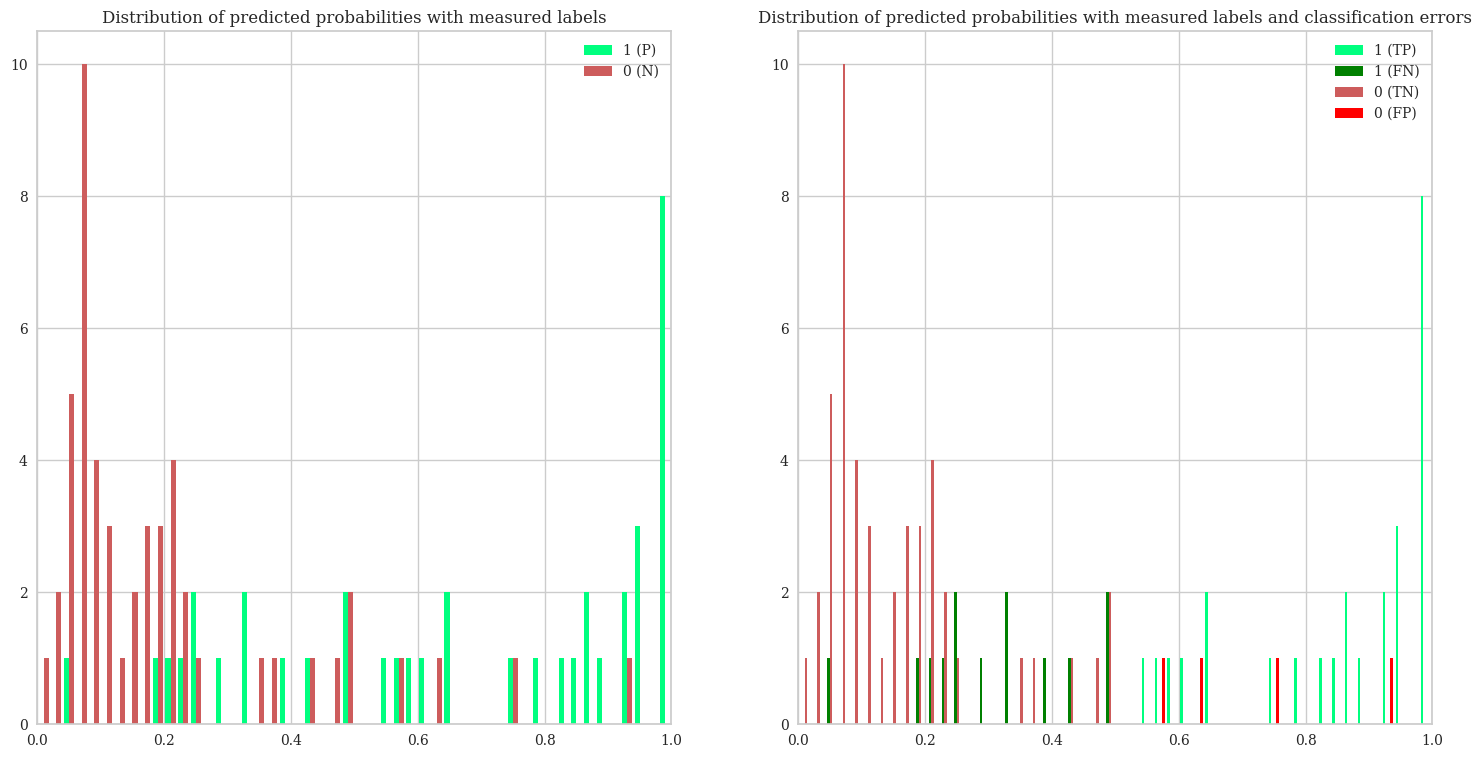

Note: Model features are sorted by importance for the model!
Features with zero importance for the model:  []


/home/rien/anaconda3/envs/data-science-tools/lib/python3.9/site-packages/pandas/io/formats/style.py:4187: RuntimeWarning: invalid value encountered in double_scalars
  start, end = z_frac, (x - left) / (right - left)


,PassengerId,Survived,prediction,bias,Sex female,Sex female (contribution),Fare,Fare (contribution),Age,Age (contribution),SibSp,SibSp (contribution),Pclass 1,Pclass 1 (contribution),Parch,Parch (contribution),Pclass 2,Pclass 2 (contribution),Embarked C,Embarked C (contribution),Embarked Q,Embarked Q (contribution)
index,,,,,,,,,,,,,,,,,,,,,,
319,320,True,0.995781,0.379695,1.000000,0.265038,134.500000,0.150442,40.000000,0.020324,1.000000,0.020667,1.000000,0.116327,1.000000,0.017622,0.000000,-0.006236,1.000000,0.031286,0.000000,0.000616
230,231,True,0.991581,0.379695,1.000000,0.281067,83.475000,0.160985,35.000000,0.026331,1.000000,0.014784,1.000000,0.132624,0.000000,0.017172,0.000000,-0.007976,0.000000,-0.013578,0.000000,0.000475
310,311,True,0.989447,0.379695,1.000000,0.291398,83.158300,0.159364,24.000000,0.001206,0.000000,0.004087,1.000000,0.117028,0.000000,0.010195,0.000000,-0.003678,1.000000,0.029742,0.000000,0.000411
380,381,True,0.987781,0.379695,1.000000,0.293158,227.525000,0.126740,42.000000,0.029840,0.000000,0.006652,1.000000,0.113107,0.000000,0.010538,0.000000,-0.004588,1.000000,0.032170,0.000000,0.000468
627,628,True,0.985647,0.379695,1.000000,0.300150,77.958300,0.156945,21.000000,0.004825,0.000000,0.014780,1.000000,0.136161,0.000000,0.009992,0.000000,-0.008035,0.000000,-0.009295,0.000000,0.000429


,PassengerId,Survived,prediction,intercept,Age,Age (contribution),Age (decision),Embarked,Embarked (contribution),Embarked (decision),Fare,Fare (contribution),Fare (decision),Parch,Parch (contribution),Parch (decision),Pclass,Pclass (contribution),Pclass (decision),Sex,Sex (contribution),Sex (decision),SibSp,SibSp (contribution),SibSp (decision)
index,,,,,,,,,,,,,,,,,,,,,,,,,
495,496,False,0.118015,0.279991,23.0,-0.039862,21.00 < Age <= 29.00,C,-0.00202,Embarked=0,14.4583,0.000066,13.86 < Fare <= 30.50,0,-0.063033,Parch <= 0.00,3,-0.061057,Pclass=2,male,0.007096,Sex=male,0,-0.003166,SibSp <= 0.00
648,649,False,0.154938,0.270381,4.0,0.107775,Age <= 21.00,S,-0.002233,Embarked=2,7.55,-0.088669,Fare <= 7.90,0,-0.069873,Parch <= 0.00,3,-0.062844,Pclass=2,male,0.000542,Sex=male,0,-0.000141,SibSp <= 0.00
278,279,False,0.27024,0.174662,7.0,0.122405,Age <= 21.00,Q,-0.003655,Embarked=1,29.125,-0.002771,13.86 < Fare <= 30.50,1,0.064465,Parch > 0.00,3,-0.060608,Pclass=2,male,-0.000725,Sex=male,4,-0.023534,SibSp > 1.00
31,32,True,0.356217,0.167513,6.0,0.108654,Age <= 21.00,C,-0.004774,Embarked=0,146.5208,0.120782,Fare > 30.50,0,-0.057983,Parch <= 0.00,1,0.018069,Pclass=0,female,-0.004131,Sex=female,1,0.008086,0.00 < SibSp <= 1.00
255,256,True,0.176978,0.219855,29.0,-0.034512,21.00 < Age <= 29.00,C,0.000151,Embarked=0,15.2458,-0.003557,13.86 < Fare <= 30.50,2,0.05873,Parch > 0.00,3,-0.065025,Pclass=2,female,0.006547,Sex=female,0,-0.005212,SibSp <= 0.00


In [8]:
# Setup hyperparameter search grid
random_grid = {'n_estimators': [10,50,100,150,200,250,500],
               'criterion': ['gini','entropy','log_loss'],
               'max_depth': [5,10,None],
               'min_samples_split': [2,10,50,100,500],
               'min_samples_leaf': [1,10,50,100,500],
               'min_weight_fraction_leaf': [0.0],
               'max_features': ['sqrt', 'log2', None],
               'max_leaf_nodes': [None],
               'min_impurity_decrease': [0.0],
               'bootstrap': [True],
               'oob_score': [False],
               'n_jobs': [-1],
               'random_state': [0],
               'verbose': [0],
               'warm_start': [False],
               'class_weight': [None],
               'ccp_alpha': [0.0],
               'max_samples': [None]
              }

# Search the hyperparameter grid for the optimal hyperparameters
rc = CDML(df_train_data,column_data_types,keys,labels,features_categorical_classes_2_drop=features_categorical_classes_2_drop)
rc.split_data(test_size=0.1,random_state=0,sampling=None)
rc.classification_model_data("RandomForestClassifier(random_state=0)",threshold=0.5) # Run a model with default settings
rc.RandomizedSearchCV(random_grid,n_iter=100)
best_estimator = rc.model.randomized_search_CV.random_search.best_estimator_
print("Best estimator:")
print(best_estimator)
print()
# Run the model with the optimal hyperparameters
rc.classification_model_data(str(best_estimator),threshold=0.5) # Run the model with the optimal hyperparameters
rc.show_learning_curve(ylim=(0,1.1),cv=StratifiedKFold(12),n_jobs=4,train_sizes=np.linspace(0.3,1.0,10),scoring='roc_auc')
rc.classification_show_ROC_precision_recall_curves(show_labels='Y',label_interval=6,label_offsets_ROC=[15,-20],label_offsets_PR=[-30,-30])
rc.classification_show_prediction_distributions(nrbins=51)
rc.save_feature_importance()
rc.classification_show_interpretation_table(sort_columns='Y',top=5)
rc.classification_transpose_interpretation_table()
rc.classification_show_interpretation_table_LIME(top=5,num_samples=5000)
rc.classification_transpose_interpretation_table_LIME()